In [30]:
%load_ext autoreload
%autoreload 2

from process import convert_parameters

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
convert_parameters(source_directory='original/a-bam-p/',
                       source_crd='full.crds',
                       source_top='full.topo',
                       destination_directory='generated/a-bam-p/',
                       destination_crd='smirnoff.inpcrd',
                       destination_top='smirnoff.prmtop',
                       host_resname='MGO',
                       guest_resname='BAM')

PDB file written by cpptraj.
First water residue = 160
Found first water CONECT entry at line = 8322
MOL2 file written by cpptraj.
MOL2 file written by antechamber.
<openeye.oechem.OEMol; proxy of <Swig Object of type 'OEMolWrapper *' at 0x7f10496a92d0> >
<openeye.oechem.OEMol; proxy of <Swig Object of type 'OEMolWrapper *' at 0x7f10496a9180> >
126 atoms in structure, 126 unique atom names.
17 atoms in structure, 17 unique atom names.
Structure looks good.
Check if the host-guest parameter file already exists...
Check if the host-guest coordinate file already exists...
Water and ion PDB file written by cpptraj.
Writing dummy atom `frcmod`.
Writing dummy atom `mol2`.
Water and ion parameters and coordinates written by tleap.
Check if solvated parameter file already exists...
Check if solvated coordinate file already exists...
Check if file exists...
Check if file exists...
<openeye.oechem.OEMol; proxy of <Swig Object of type 'OEMolWrapper *' at 0x7f10496a9090> >
<openeye.oechem.OEMol; p

In [54]:
with open('generated/a-bam-p/equilibration.sh', 'w') as file:
    file.write('#!/usr/bin/env bash\n')
    file.write('source $AMBERHOME/amber.sh\n')
    file.write('pmemd.cuda -O -p smirnoff.prmtop -ref smirnoff.inpcrd -c smirnoff.inpcrd -i mini.in '
               '-o mini.out -r mini.rst -inf /dev/null\n')
    file.write('pmemd.cuda -O -p smirnoff.prmtop -ref smirnoff.inpcrd -c mini.rst -i therm1.in '
               '-o therm1.out -r therm1.rst -inf therm1.mdinfo\n')
    file.write('pmemd.cuda -O -p smirnoff.prmtop -ref smirnoff.inpcrd -c therm1.rst -i therm2.in '
               '-o therm2.out -r therm2.rst -inf therm2.mdinfo\n')
    file.write('cp therm2.rst eqnpt.rst\n')
    file.write('\n')
    for iteration in range(1, 101):
        file.write(f'pmemd.cuda -O -p smirnoff.prmtop -ref smirnoff.inpcrd -c eqnpt.rst -i eqnpt.in '
                   f'-o eqnpt.{iteration:02d}.out -r eqnpt.{iteration:02d}.rst -inf /dev/null >& eqnpt.log \n')
        file.write(f'cat eqnpt.{iteration:02d}.out >> eqnpt.all.out\n')
        file.write(f'cp eqnpt.{iteration:02d}.rst eqnpt.rst\n')
        file.write('\n')

In [57]:
with open('generated/a-bam-p/md.sh', 'w') as file:
    file.write('#!/usr/bin/env bash\n')
    file.write('source $AMBERHOME/amber.sh\n')
    file.write('cp eqnpt.100.rst md.000.rst\n')
    file.write('\n')
    for iteration in range(1, 201):
        file.write(f'pmemd.cuda -O -p smirnoff.prmtop -ref smirnoff.inpcrd -c md.{(iteration-1):03d}.rst -i mdin '
                   f'-o mdout.{iteration:03d} -r md.{iteration:03d}.rst -x traj.{iteration:03d}.nc -inf mdinfo.{iteration:03d} -e mden.{iteration:03d} \n')
        file.write('\n')

In [63]:
mden[1]

array([ nan,  nan,  nan,  nan,  nan])

In [102]:
with open('generated/a-bam-p/mden.001') as mden:
        energies, time_in_ps = [], []
        for line_number, line in enumerate(mden):
            if 'L0' in line and line_number != 0:
                energy = line.split()[3]
                energies.append(float(energy))
                time = line.split()[2]
                time_in_ps.append(float(time))

In [103]:

%matplotlib inline
import matplotlib.pyplot as plt

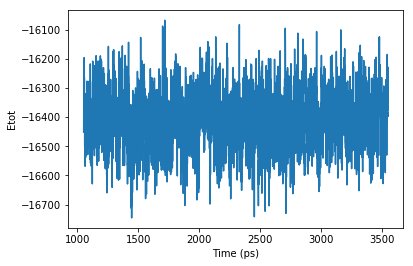

In [105]:
plt.plot(time_in_ps, energies)
plt.xlabel('Time (ps)')
plt.ylabel('Etot')

In [106]:
with open('original/a-bam-p/mden.001') as mden:
        energies, time_in_ps = [], []
        for line_number, line in enumerate(mden):
            if 'L0' in line and line_number != 0:
                energy = line.split()[3]
                energies.append(float(energy))
                time = line.split()[2]
                time_in_ps.append(float(time))

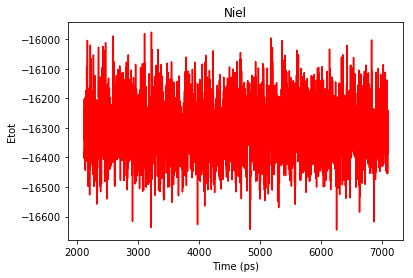

In [107]:
plt.plot(time_in_ps, energies, c='r')
plt.xlabel('Time (ps)')
plt.ylabel('Etot')
plt.title('Niel')

Probably should clone `simulation` and bring it in here.

In [111]:
import glob as glob

energies, time_in_ps = [], []
for file in glob.glob('generated/a-bam-p/mden*'):
    with open(file) as mden:
            for line_number, line in enumerate(mden):
                if 'L0' in line and line_number != 0:
                    energy = line.split()[3]
                    energies.append(float(energy))
                    time = line.split()[2]
                    time_in_ps.append(float(time))

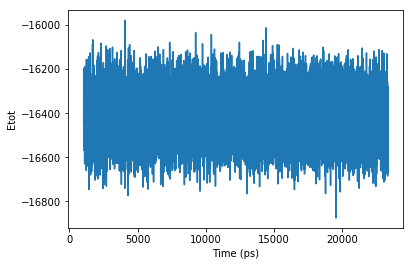

In [112]:
plt.plot(time_in_ps, energies)
plt.xlabel('Time (ps)')
plt.ylabel('Etot')